# TPOT Automated ML Exploration with Mushroom Classification 
## By Jeff Hale

This is my experimentation with the TPOT automated machine learning algorithm with the Mushroom classification task. For more information see [this Medium article](https://medium.com/p/4c063b3e5de9/) I wrote discussing TPOT. 

In [6]:
# import the usual packages
import time
import gc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
import category_encoders

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

pd.options.display.max_columns = 200
pd.options.display.width = 200

%matplotlib inline
sns.set(font_scale=1.5, palette="colorblind")

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir("../input"))

['agaricus-lepiota.csv']


Read in the data, encode it, and split it into training and test sets.

In [7]:
df = pd.read_csv('../input/agaricus-lepiota.csv')

X = df.reindex(columns=[x for x in df.columns.values if x != 'class'])        # separate out X
X = X.apply(LabelEncoder().fit_transform)  # encode the x columns string values as integers

y = df.reindex(columns=['class'])   # separate out y
print(y['class'].value_counts())
y = np.ravel(y)                     # flatten the y array
y = LabelEncoder().fit_transform(y) # encode y column strings as integer

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=10) 

e    4208
p    3916
Name: class, dtype: int64


Check out the data 

In [8]:
print(X_train.describe())
print(X_train.info())

          capshape   capsurface     capcolor      bruises         odor  gillattachment  gillspacing     gillsize    gillcolor   stalkshape    stalkroot  stalksurfaceabovering  stalksurfacebelowring  \
count  6093.000000  6093.000000  6093.000000  6093.000000  6093.000000     6093.000000  6093.000000  6093.000000  6093.000000  6093.000000  6093.000000            6093.000000            6093.000000   
mean      3.340391     1.820121     4.470376     0.415723     4.162153        0.974725     0.158214     0.313146     4.763335     0.570162     1.090268               1.579353               1.601510   
std       1.598897     1.233882     2.546672     0.492887     2.102190        0.156972     0.364972     0.463811     3.546491     0.495093     1.050463               0.615632               0.671195   
min       0.000000     0.000000     0.000000     0.000000     0.000000        0.000000     0.000000     0.000000     0.000000     0.000000     0.000000               0.000000               0.00000

Instantiate TPOTclassifier object - the generation and population_size determine how many populations are made.

In [9]:
tpot = TPOTClassifier(verbosity=3, 
                      scoring="accuracy", 
                      random_state=10, 
                      periodic_checkpoint_folder="tpot_mushroom_results", 
                      n_jobs=-1, 
                      generations=2, 
                      population_size=10)
times = []
scores = []
winning_pipes = []

# run several fits 
for x in range(10):
    start_time = timeit.default_timer()
    tpot.fit(X_train, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test, y_test))
    tpot.export('tpot_mushroom.py')

# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

Optimization Progress:   0%|          | 0/30 [00:00<?, ?pipeline/s]

30 operators have been imported by TPOT.


Optimization Progress:  37%|███▋      | 11/30 [00:31<03:29, 11.05s/pipeline]

Created new folder to save periodic pipeline: tpot_mushroom_results
Saving best periodic pipeline to tpot_mushroom_results/pipeline_2018.08.22_02-48-03.py
_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Optimization Progress:  70%|███████   | 21/30 [00:54<01:29,  9.97s/pipeline]

Generation 1 - Current Pareto front scores:
-1	0.9991795203101026	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=9, DecisionTreeClassifier__min_samples_leaf=5, DecisionTreeClassifier__min_samples_split=18)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Generation 2 - Current Pareto front scores:
-1	1.0	KNeighborsClassifier(input_matrix, KNeighborsClassifier__n_neighbors=31, KNeighborsClassifier__p=1, KNeighborsClassifier__weights=distance)



Optimization Progress:  30%|███       | 9/30 [00:00<00:00, 465.38pipeline/s]

_pre_test decorator: _generate: num_test=0 Input X must be non-negative
_pre_test decorator: _generate: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been 

Optimization Progress:  67%|██████▋   | 20/30 [00:14<00:22,  2.20s/pipeline]

Generation 1 - Current Pareto front scores:
-1	0.9995073891625615	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=entropy, ExtraTreesClassifier__max_features=0.4, ExtraTreesClassifier__min_samples_leaf=7, ExtraTreesClassifier__min_samples_split=15, ExtraTreesClassifier__n_estimators=100)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Optimization Progress:  67%|██████▋   | 20/30 [00:15<00:15,  1.55s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Generation 2 - Current Pareto front scores:
-1	1.0	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=18, RandomForestClassifier__n_estimators=100)



Optimization Progress:  30%|███       | 9/30 [00:00<00:00, 404.30pipeline/s]

_pre_test decorator: _generate: num_test=0 Input X must be non-negative
_pre_test decorator: _generate: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been 

Optimization Progress:  67%|██████▋   | 20/30 [00:07<00:21,  2.18s/pipeline]

Generation 1 - Current Pareto front scores:
-1	0.9908121362411013	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=14, DecisionTreeClassifier__min_samples_split=6)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Generation 2 - Current Pareto front scores:
-1	0.9908121362411013	DecisionTreeClassifier(input_matrix, DecisionTreeClassifier__criterion=gini, DecisionTreeClassifier__max_depth=7, DecisionTreeClassifier__min_samples_leaf=14, DecisionTreeClassifier__min_samples_split=6)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Optimization Progress:  30%|███       | 9/30 [00:00<00:00, 331.58pipeline/s]

_pre_test decorator: _generate: num_test=0 Input X must be non-negative
_pre_test decorator: _generate: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been 

Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 61.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Generation 1 - Current Pareto front scores:
-1	1.0	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.5, ExtraTreesClassifier__min_samples_leaf=2, ExtraTreesClassifier__min_samples_split=18, ExtraTreesClassifier__n_estimators=100)

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 manhattan was provided as affinity. Ward can only work with euclidean distances.


Optimization Progress:  67%|██████▋   | 20/30 [00:09<00:09,  1.05pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
Invalid pipeline encountered. Skipping its evaluation.


Generation 2 - Current Pareto front scores:
-1	1.0	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=False, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.5, ExtraTreesClassifier__min_samples_leaf=2, ExtraTreesClassifier__min_samples_split=18, ExtraTreesClassifier__n_estimators=100)



Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 265.11pipeline/s]

_pre_test decorator: _generate: num_test=0 Input X must be non-negative
_pre_test decorator: _generate: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been 

Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 82.40pipeline/s] 

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  67%|██████▋   | 20/30 [00:05<00:04,  2.46pipeline/s]

Generation 1 - Current Pareto front scores:
-1	1.0	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=7, GradientBoostingClassifier__max_features=0.8500000000000001, GradientBoostingClassifier__min_samples_leaf=1, GradientBoostingClassifier__min_samples_split=2, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.7500000000000001)

_pre_test decorator: _random_mutation_operator: num_test=0 X contains negative values.


Generation 2 - Current Pareto front scores:
-1	1.0	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=1.0, GradientBoostingClassifier__max_depth=7, GradientBoostingClassifier__max_features=0.8500000000000001, GradientBoostingClassifier__min_samples_leaf=1, GradientBoostingClassifier__min_samples_split=2, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.7500000000000001)



Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 127.17pipeline/s]

_pre_test decorator: _generate: num_test=0 Input X must be non-negative
_pre_test decorator: _generate: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been 

Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 34.95pipeline/s] 

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='logistic_regression' are not supported when dual=True, Parameters: penalty='l1', loss='logistic_regression', dual=True


Optimization Progress:  67%|██████▋   | 20/30 [00:09<00:13,  1.35s/pipeline]

Generation 1 - Current Pareto front scores:
-1	0.9801426711415623	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=5, GradientBoostingClassifier__max_features=0.7500000000000001, GradientBoostingClassifier__min_samples_leaf=18, GradientBoostingClassifier__min_samples_split=15, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.3)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Generation 2 - Current Pareto front scores:
-1	1.0	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=19, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 214.16pipeline/s]

_pre_test decorator: _generate: num_test=0 Input X must be non-negative
_pre_test decorator: _generate: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been 

Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 48.30pipeline/s] 

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  67%|██████▋   | 20/30 [00:06<00:10,  1.01s/pipeline]

Generation 1 - Current Pareto front scores:
-1	0.9842445307768987	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=5, GradientBoostingClassifier__max_features=0.7500000000000001, GradientBoostingClassifier__min_samples_leaf=18, GradientBoostingClassifier__min_samples_split=15, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.45)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Optimization Progress:  70%|███████   | 21/30 [00:07<00:06,  1.38pipeline/s]

Invalid pipeline encountered. Skipping its evaluation.


Generation 2 - Current Pareto front scores:
-1	0.9963902128296022	XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.5, XGBClassifier__max_depth=7, XGBClassifier__min_child_weight=9, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.2)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Optimization Progress:  30%|███       | 9/30 [00:00<00:00, 321.88pipeline/s]

_pre_test decorator: _generate: num_test=0 Input X must be non-negative
_pre_test decorator: _generate: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been 

Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 40.01pipeline/s]

Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  67%|██████▋   | 20/30 [00:09<00:13,  1.38s/pipeline]

Generation 1 - Current Pareto front scores:
-1	0.9990153166976231	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.35000000000000003, ExtraTreesClassifier__min_samples_leaf=12, ExtraTreesClassifier__min_samples_split=4, ExtraTreesClassifier__n_estimators=100)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Optimization Progress:  67%|██████▋   | 20/30 [00:09<00:09,  1.02pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Found array with 0 feature(s) (shape=(50, 0)) while a minimum of 1 is required.
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Generation 2 - Current Pareto front scores:
-1	0.9990153166976231	ExtraTreesClassifier(input_matrix, ExtraTreesClassifier__bootstrap=True, ExtraTreesClassifier__criterion=gini, ExtraTreesClassifier__max_features=0.35000000000000003, ExtraTreesClassifier__min_samples_leaf=12, ExtraTreesClassifier__min_samples_split=4, ExtraTreesClassifier__n_estimators=100)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)



Optimization Progress:  30%|███       | 9/30 [00:00<00:00, 382.87pipeline/s]

_pre_test decorator: _generate: num_test=0 Input X must be non-negative
_pre_test decorator: _generate: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been 

Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 28.94pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.


Optimization Progress:  67%|██████▋   | 20/30 [00:06<00:06,  1.64pipeline/s]

Generation 1 - Current Pareto front scores:
-1	1.0	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__min_samples_split=4, RandomForestClassifier__n_estimators=100)

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Optimization Progress:  67%|██████▋   | 20/30 [00:06<00:06,  1.64pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative


Generation 2 - Current Pareto front scores:
-1	1.0	RandomForestClassifier(input_matrix, RandomForestClassifier__bootstrap=False, RandomForestClassifier__criterion=gini, RandomForestClassifier__max_features=0.35000000000000003, RandomForestClassifier__min_samples_leaf=2, RandomForestClassifier__min_samples_split=4, RandomForestClassifier__n_estimators=100)



Optimization Progress:  33%|███▎      | 10/30 [00:00<00:00, 304.05pipeline/s]

_pre_test decorator: _generate: num_test=0 Input X must be non-negative
_pre_test decorator: _generate: num_test=0 Input X must be non-negative
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been evaluated during the optimization process. Using the score from the previous evaluation.
Pipeline encountered that has previously been 

Optimization Progress:  37%|███▋      | 11/30 [00:00<00:00, 29.05pipeline/s] 

Invalid pipeline encountered. Skipping its evaluation.


Optimization Progress:  67%|██████▋   | 20/30 [00:23<00:23,  2.31s/pipeline]

Generation 1 - Current Pareto front scores:
-1	0.9990153169184485	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=8, GradientBoostingClassifier__max_features=0.3, GradientBoostingClassifier__min_samples_leaf=7, GradientBoostingClassifier__min_samples_split=10, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.9000000000000001)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)

_pre_test decorator: _random_mutation_operator: num_test=0 Input X must be non-negative
_pre_test decorator: _random_

Optimization Progress:  67%|██████▋   | 20/30 [00:23<00:16,  1.63s/pipeline]

_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True


Generation 2 - Current Pareto front scores:
-1	0.9990153169184485	GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.001, GradientBoostingClassifier__max_depth=8, GradientBoostingClassifier__max_features=0.3, GradientBoostingClassifier__min_samples_leaf=7, GradientBoostingClassifier__min_samples_split=10, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.9000000000000001)
-2	1.0	RandomForestClassifier(PolynomialFeatures(input_matrix, PolynomialFeatures__degree=2, PolynomialFeatures__include_bias=False, PolynomialFeatures__interaction_only=False), RandomForestClassifier__bootstrap=True, RandomForestClassifier__criterion=entropy, RandomForestClassifier__max_features=0.55, RandomForestClassifier__min_samples_leaf=18, RandomForestClassifier__min_samples_split=16, RandomForestClassifier__n_estimators=100)

Times: [1.2512280698836549, 1.1037309137667761, 0.4617533429166845, 0.5888661408661089, 1.4639320732996566, 0.3877597

Make a data frame of the time to fit thirty pipelines ten times  are from a previous uncommitted run. All scores on the test set were 1.0.

In [14]:
# timeo = [1.6234928817333032, 1.162914126116084, 0.6119730584498029, 0.9018127734161681, 
#          2.0324099983001362, 0.45596561313335165, 0.4123572280164808, 1.9914514322998003, 
#          0.31134609155027043, 2.268216603050435]  # previous times
timeo = np.array(times)
df = pd.DataFrame(np.reshape(timeo, (len(timeo))))
df= df.rename(columns={0: "Times"})
df = df.reset_index()
df = df.rename(columns = {"index": "Runs"})
print(df)

   Runs     Times
0     0  1.251228
1     1  1.103731
2     2  0.461753
3     3  0.588866
4     4  1.463932
5     5  0.387760
6     6  0.306767
7     7  1.481339
8     8  0.274663
9     9  0.998701


Make a seaborn barplot of the TPOT fit times for 10 pipelines.

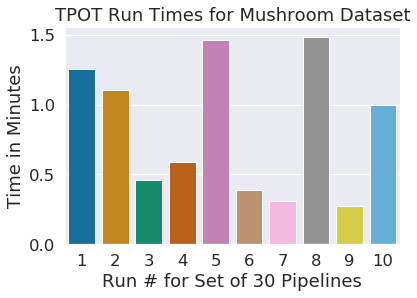

In [15]:
ax = sns.barplot(x= np.arange(1, 11), y = "Times", data = df)
ax.set(xlabel='Run # for Set of 30 Pipelines', ylabel='Time in Minutes')
plt.title("TPOT Run Times for Mushroom Dataset")
plt.show()